In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import bnlearn as bn
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

Pre-processing, Data Cleaning, Feature Engineering

In [3]:
dataDf = pd.read_excel("data.xlsx", dtype=object)
columnNames = dataDf.columns

dataDf.dropna(inplace=True)
dataDf['GENDER'] = dataDf['GENDER'].replace(["Male", "Female"], [1,2])
for i in range(4, 43-9):
    dataDf = dataDf.astype({dataDf.columns[i]: str})

for i in range(len(dataDf)):
    row = dataDf.iloc[i]
    for c in range(4, 18):
        row[columnNames[c]] = row[columnNames[c]].strip(".")
        row[columnNames[c]] = row[columnNames[c]].split('.')
    dataDf.iloc[i] = row
for i in range(len(dataDf)):
    for c in range(4, 18):
        dataDf = dataDf.explode(columnNames[c])

dropList = ['Questioinnaire number ', 'AGE', 'HOME LANGUAGE']
dataDf = dataDf.drop(columns=dropList)

dataDf['PASSED'] = 0
dataDf.loc[dataDf['FNL ILS'] >= 50, 'PASSED'] = 1

columns = dataDf.columns

In [4]:
miscDf = dataDf[columns[:7]]
miscDf['PASSED'] = dataDf['PASSED']
miscDf = miscDf.drop_duplicates()
#miscDf

In [5]:
dataDf = pd.read_excel("data.xlsx", dtype=object)
dataDf['PASSED'] = 0
dataDf.loc[dataDf['FNL ILS'] >= 50, 'PASSED'] = 1; columns = dataDf.columns

In [6]:
schoolExpDf = dataDf[columns[13:18]]
schoolExpDf['PASSED'] = dataDf['PASSED']
#schoolExpDf = schoolExpDf.dropna()
schoolExpCols = schoolExpDf.columns
for i in range(len(schoolExpDf)):
    for c in schoolExpCols:
        schoolExpDf[c].iloc[i] = str(schoolExpDf[c].iloc[i]).strip(".")
        schoolExpDf[c].iloc[i] = str(schoolExpDf[c].iloc[i]).split('.')
for i in range(len(schoolExpDf)):
    for c in schoolExpCols:
        schoolExpDf = schoolExpDf.explode(c)
#schoolExpDf

In [7]:
familyDf = dataDf[columns[30:34]]
familyDf[columns[10]] = dataDf[columns[10]]
familyDf[columns[11]] = dataDf[columns[11]]
familyDf['PASSED'] = dataDf['PASSED']
#familyDf = familyDf.dropna()
familyCols = familyDf.columns
for i in range(len(familyDf)):
    for c in familyCols:
        familyDf[c].iloc[i] = str(familyDf[c].iloc[i]).strip(".")
        familyDf[c].iloc[i] = str(familyDf[c].iloc[i]).split('.')
for i in range(len(familyDf)):
    for c in familyCols:
        familyDf = familyDf.explode(c)
#familyDf

In [8]:
peerDf = dataDf[columns[22:26]]
peerDf['PASSED'] = dataDf['PASSED']
#peerDf = peerDf.dropna()
peerCols = peerDf.columns
for i in range(len(peerDf)):
    for c in peerCols:
        peerDf[c].iloc[i] = str(peerDf[c].iloc[i]).strip(".")
        peerDf[c].iloc[i] = str(peerDf[c].iloc[i]).split('.')
for i in range(len(peerDf)):
    for c in peerCols:
        peerDf = peerDf.explode(c)
#peerDf

In [9]:
schoolBackDf = dataDf[columns[26:30]]
schoolBackDf['PASSED'] = dataDf['PASSED']
#schoolBackDf = schoolBackDf.dropna()
schoolBackCols = schoolBackDf.columns
for i in range(len(schoolBackDf)):
    for c in schoolBackCols:
        schoolBackDf[c].iloc[i] = str(schoolBackDf[c].iloc[i]).strip(".")
        schoolBackDf[c].iloc[i] = str(schoolBackDf[c].iloc[i]).split('.')
for i in range(len(schoolBackDf)):
    for c in schoolBackCols:
        schoolBackDf = schoolBackDf.explode(c)
#schoolBackDf

In [10]:
selfDf = dataDf[columns[30:34]]
selfDf['PASSED'] = dataDf['PASSED']
#selfDf = selfDf.dropna()
selfCols = selfDf.columns
for i in range(len(selfDf)):
    for c in selfCols:
        selfDf[c].iloc[i] = str(selfDf[c].iloc[i]).strip(".")
        selfDf[c].iloc[i] = str(selfDf[c].iloc[i]).split('.')
for i in range(len(selfDf)):
    for c in selfCols:
        selfDf = selfDf.explode(c)
#selfDf

Train, Test and Data Prep

In [94]:
from sklearn.model_selection import train_test_split
trainDf, testDf = train_test_split(schoolExpDf, test_size=0.2)

In [95]:
trainDf

,GENDER,What career would you like to pursue when you complete your studies,Broader categories for career aspirations,What factor/s triggered your interest in your chosen career pursuit,Broad category of the factors that influenced career aspiration,To what extent are you still interested in this career,Elaborate,PASSED
81,2,1,1,29,1,1,43,0
57,2,1,5,15,1,1,12,1
68,2,76,2,22,4,1,39,1
57,2,1,2,21,1,1,12,1
103,2,1,5,2,1,1,45,1
...,...,...,...,...,...,...,...,...
81,2,27,2,42,1,1,43,0
99,2,84,2,1,1,1,3,0
19,2,13,5,1,1,1,7,1
63,2,25,2,11,4,3,18,1


In [96]:
trainDf.describe()

,GENDER,PASSED
count,288.000000,288.000000
mean,1.833333,0.416667
std,0.373327,0.493865
min,1.000000,0.000000
25%,2.000000,0.000000
50%,2.000000,0.000000
75%,2.000000,1.000000
max,2.000000,1.000000


In [97]:
dfHotTrain, dfNumTrain = bn.df2onehot(trainDf)
dfHotTest, dfNumTest = bn.df2onehot(testDf)


[df2onehot] >Auto detecting dtypes.


100%|██████████| 8/8 [00:00<00:00, 360.72it/s]


[df2onehot] >Set dtypes in dataframe..


100%|██████████| 8/8 [00:00<00:00, 363.68it/s]


[df2onehot] >Total onehot features: 37

[df2onehot] >Auto detecting dtypes.


100%|██████████| 8/8 [00:00<00:00, 457.09it/s]


[df2onehot] >Set dtypes in dataframe..


100%|██████████| 8/8 [00:00<00:00, 573.65it/s]

[df2onehot] >Total onehot features: 20


In [98]:
dfNumTrain

,GENDER,What career would you like to pursue when you complete your studies,Broader categories for career aspirations,What factor/s triggered your interest in your chosen career pursuit,Broad category of the factors that influenced career aspiration,To what extent are you still interested in this career,Elaborate,PASSED
0,1,1,1,7,1,1,6,0
1,1,1,4,3,1,1,2,1
2,1,0,2,6,3,1,0,1
3,1,1,2,5,1,1,2,1
4,1,1,4,0,1,1,0,1
...,...,...,...,...,...,...,...,...
283,1,4,2,9,1,1,6,0
284,1,0,2,1,1,1,4,0
285,1,0,4,1,1,1,0,1
286,1,3,2,2,3,3,0,1


In [99]:
dfNumTarget = dfNumTrain.pop('PASSED')

In [100]:
#dfNumTrain = dfNumTrain.drop(columns=schoolExpCols[0])
xTrain, xVal, zTrain, zVal = train_test_split(dfNumTrain, dfNumTarget, test_size=0.2, random_state=0)
valid = pd.concat([xVal, zVal], axis='columns')
dfNum = pd.concat([xTrain, zTrain], axis='columns')

In [101]:
dfNum

,GENDER,What career would you like to pursue when you complete your studies,Broader categories for career aspirations,What factor/s triggered your interest in your chosen career pursuit,Broad category of the factors that influenced career aspiration,To what extent are you still interested in this career,Elaborate,PASSED
46,1,5,4,7,3,1,6,0
258,1,0,4,2,3,1,0,1
215,0,1,4,7,3,3,8,1
168,0,0,2,0,1,1,4,0
224,0,1,4,0,2,3,8,1
...,...,...,...,...,...,...,...,...
251,1,2,3,8,3,2,3,0
192,1,0,1,8,1,2,3,0
117,1,1,1,4,3,1,2,1
47,1,0,4,1,3,1,0,1


In [102]:
def getAccuracy(model, df, col):
    pred = bn.predict(model, df, variables=[col])
    print(pred)
    acc = accuracy_score(df[col], pred[col])
    print('Accuracy -', acc)
    return acc

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


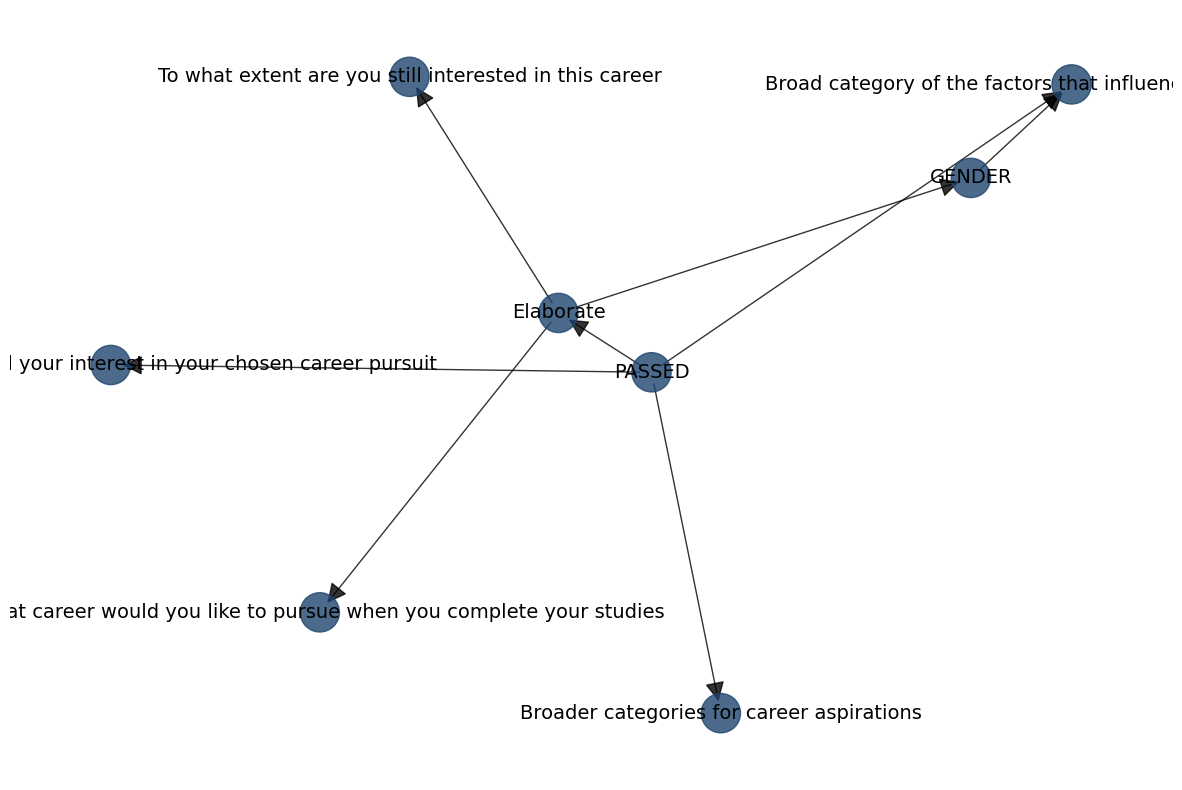

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of GENDER:
+-----------+--------------------+-----+--------------------+
| Elaborate | Elaborate(0)       | ... | Elaborate(8)       |
+-----------+--------------------+-----+--------------------+
| GENDER(0) | 0.4464710547184774 | ... | 0.5523724261414503 |
+-----------+--------------------+-----+--------------------+
| GENDER(1) | 0.5535289452815226 | ... | 0.4476275738585497 |
+-----------+--------------------+-----+--------------------+
[bnlearn] >CPD of Broad category of the factors that influenced career aspiration:
+-----+---------------------+
| ... | GENDER(1)           |
+-----+---------------------+
| ... | PASSED(1)           |
+-----+---------------------+
| ... | 0.2220496894409938  |
+-----+---------------------+
| ... | 0.2717391304347826  |
+-----+----------------

In [103]:
DAG = bn.structure_learning.fit(dfNum, methodtype='hc', root_node='PASSED', black_list=[schoolExpCols[0]], bw_list_method='nodes', verbose=3)
G = bn.plot(DAG)
model = bn.parameter_learning.fit(DAG, dfNum, verbose=3)

In [104]:
acc1 = getAccuracy(model, valid, 'PASSED')

[bnlearn]> Remaining columns for inference: 7


100%|██████████| 55/55 [00:00<00:00, 195.35it/s]

    PASSED         p
0        0  0.644603
1        0  0.812516
2        0  0.795270
3        1  0.646223
4        0  0.760403
5        0  0.730563
6        0  0.760403
7        0  0.804658
8        0  0.792894
9        0  0.770200
10       0  0.812516
11       1  0.649868
12       1  0.651225
13       1  0.648466
14       0  0.734043
15       1  0.607383
16       0  0.814719
17       1  0.710287
18       1  0.588939
19       0  0.804658
20       0  0.799760
21       1  0.688727
22       1  0.505727
23       1  0.696749
24       0  0.601325
25       0  0.773237
26       0  0.819712
27       0  0.749070
28       1  0.714265
29       0  0.509665
30       1  0.637076
31       0  0.781770
32       1  0.689746
33       0  0.802588
34       0  0.734043
35       0  0.759191
36       1  0.673007
37       0  0.750764
38       0  0.799351
39       1  0.615115
40       0  0.713496
41       0  0.754071
42       1  0.539605
43       1  0.658229
44       1  0.696749
45       0  0.632744
46       0  0

[bnlearn] >Filter variables (nodes) on black_list..
[bnlearn] >Number of features after white/black listing: 8
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


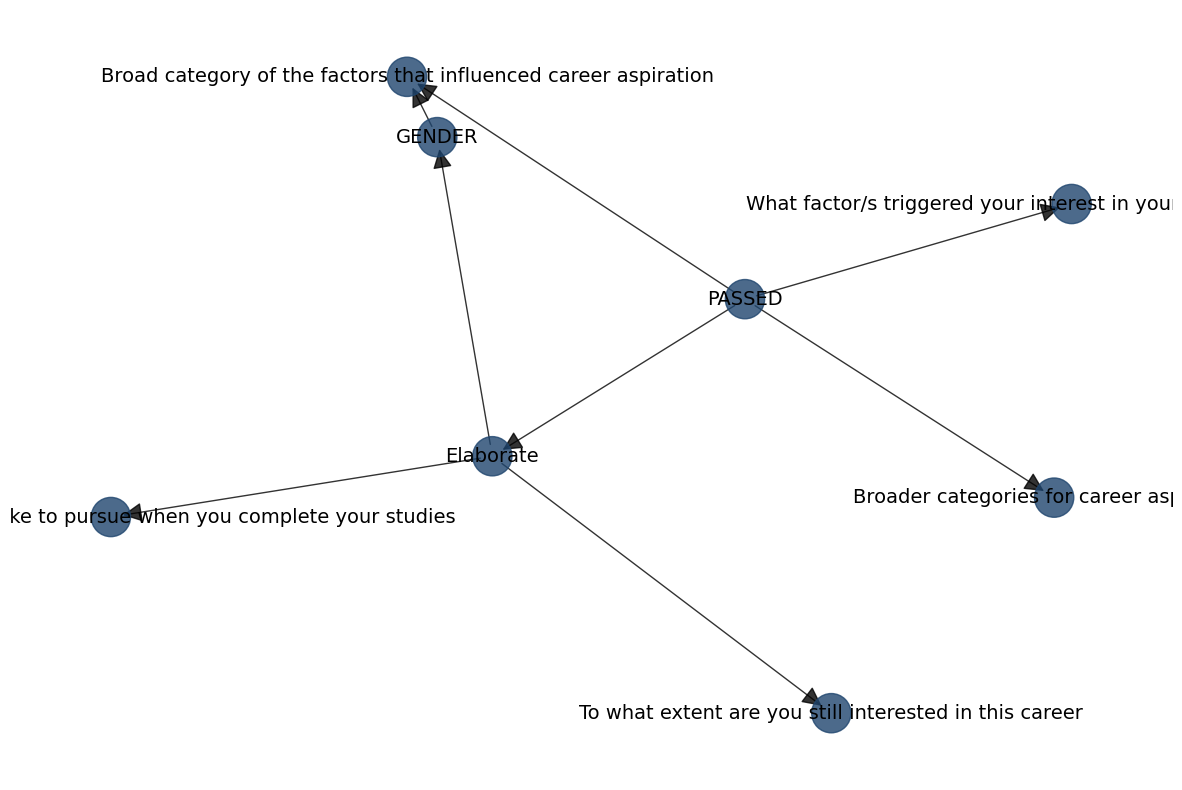

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of GENDER:
+-----------+--------------------+-----+--------------------+
| Elaborate | Elaborate(0)       | ... | Elaborate(8)       |
+-----------+--------------------+-----+--------------------+
| GENDER(0) | 0.4464710547184774 | ... | 0.5523724261414503 |
+-----------+--------------------+-----+--------------------+
| GENDER(1) | 0.5535289452815226 | ... | 0.4476275738585497 |
+-----------+--------------------+-----+--------------------+
[bnlearn] >CPD of Broad category of the factors that influenced career aspiration:
+-----+---------------------+
| ... | GENDER(1)           |
+-----+---------------------+
| ... | PASSED(1)           |
+-----+---------------------+
| ... | 0.2220496894409938  |
+-----+---------------------+
| ... | 0.2717391304347826  |
+-----+----------------

In [105]:
DAG2 = bn.structure_learning.fit(dfNum, methodtype='hc', black_list=['SibSp'], root_node='PASSED', bw_list_method='nodes', verbose=4)

# Plot
G2 = bn.plot(DAG2)

# Parameter learning
model2 = bn.parameter_learning.fit(DAG2, dfNum, verbose=4)

In [106]:
acc1 = getAccuracy(model2, valid.drop(columns=schoolExpCols[0]), 'PASSED')

[bnlearn]> Remaining columns for inference: 7


100%|██████████| 55/55 [00:00<00:00, 207.27it/s]

    PASSED         p
0        0  0.644603
1        0  0.812516
2        0  0.795270
3        1  0.646223
4        0  0.760403
5        0  0.730563
6        0  0.760403
7        0  0.804658
8        0  0.792894
9        0  0.770200
10       0  0.812516
11       1  0.649868
12       1  0.651225
13       1  0.648466
14       0  0.734043
15       1  0.607383
16       0  0.814719
17       1  0.710287
18       1  0.588939
19       0  0.804658
20       0  0.799760
21       1  0.688727
22       1  0.505727
23       1  0.696749
24       0  0.601325
25       0  0.773237
26       0  0.819712
27       0  0.749070
28       1  0.714265
29       0  0.509665
30       1  0.637076
31       0  0.781770
32       1  0.689746
33       0  0.802588
34       0  0.734043
35       0  0.759191
36       1  0.673007
37       0  0.750764
38       0  0.799351
39       1  0.615115
40       0  0.713496
41       0  0.754071
42       1  0.539605
43       1  0.658229
44       1  0.696749
45       0  0.632744
46       0  0

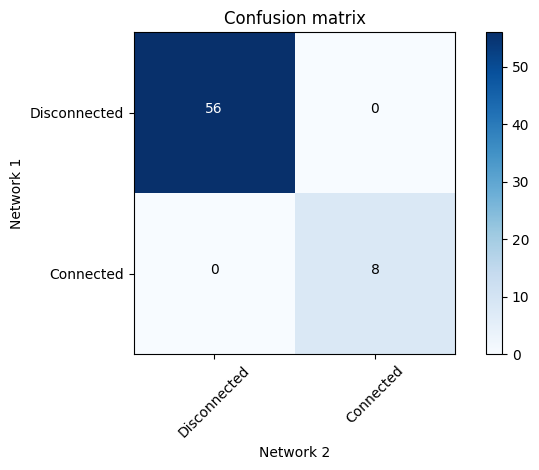

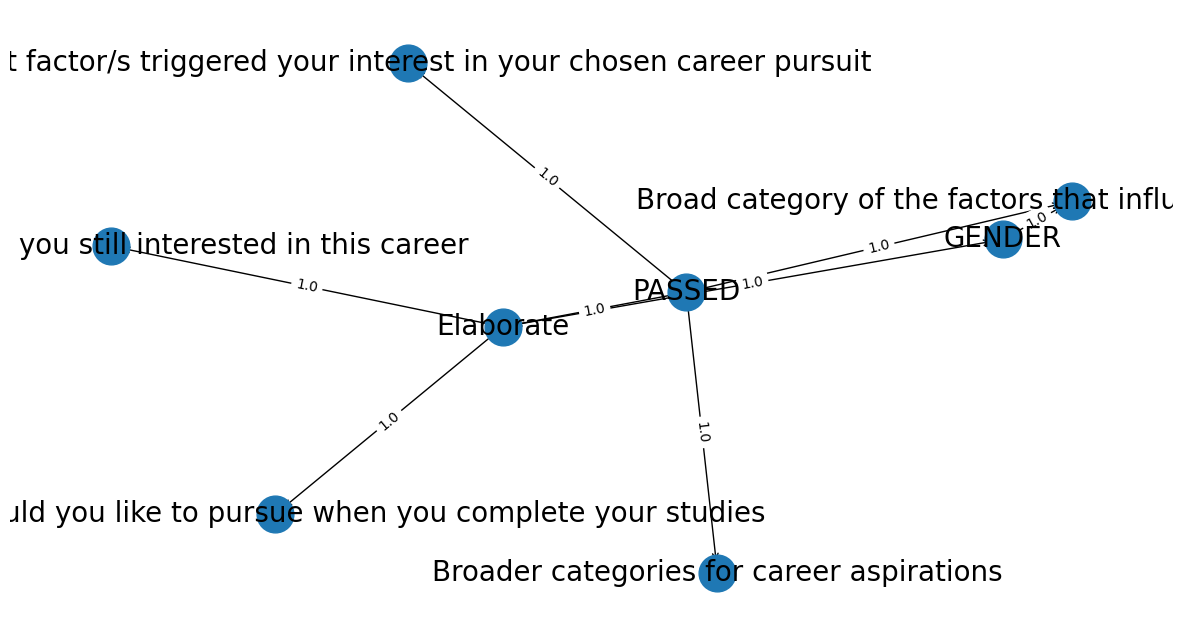

Coincidence - 1.0


In [107]:
res = bn.bnlearn.compare_networks(model, model2, figsize=(15, 8), verbose=3)
print('Coincidence -', (res[0][0, 0] + res[0][1, 1])/res[0].sum())